# Preview - Insurance Charges

> Source Link: https://www.kaggle.com/datasets/mirichoi0218/insurance

- Goal of this notebook is to paste a template version of the workflow from the ADMIN_Comparing_Datasets notebook.
 
**The code will:**
- Create 4 preprocessing pipelines (one with scaling and one without)
    - `preprocessor`
        - Clone: `preprocessor_cln`
    - `preprocessor_scale`
        - Clone: `preprocessor_scale_cln`    
    
- Create 4 Versions of the X/y data.
    - **All Data/Rows:**
        - Starting Vars:
            - df,X,y, X_train, X_test,y_train,y_test
        - **Unscaled**
            - Without a  constant:
                - X_train_df, X_test_df, y_train,y_test
            - With a constant:
                - X_train_df_cnst, X_test_df_cnst, y_train (same), y_test (same)
        - **Scaled:**
            - Without a  constant:
                - X_train_df_scaled, X_test_df_scaled, y_train (same), y_test (same)
            - With a constant:
                - X_train_df_scaled_cnst, X_test_df_scaled_cnst, y_train (same), y_test (same)

    - **Cleaned/Outliers Removed**
        - Starting Vars:
            - df_clean,X_cln,y_cln, X_train_cln, X_test_cln,y_train_cln,y_test_cln
        - **Unscaled**
            - Without a  constant:
                - X_train_df_cln, X_test_df_cln, y_train,y_test
            - With a constant:
                - X_train_df_cln_cnst, X_test_df_cln_cnst, y_train_cln (same), y_test_cln (same)
        - **Scaled:**
            - Without a  constant:
                - X_train_df_cln_scaled, X_test_df_cln_scaled, y_train_cln (same), y_test_cln (same)
            - With a constant:
                - X_train_df_scaled_cln_cnst, X_test_df_cln_scaled_cnst, y_train_cln (same), y_test_cln (same)

# Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
## Customization Options
# pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option("display.max_columns",100)
plt.style.use(['fivethirtyeight','seaborn-talk'])
mpl.rcParams['figure.facecolor']='white'

## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics

from sklearn.base import clone

## fixing random for lesson generation
np.random.seed(321)

##import statsmodels correctly
import statsmodels.api as sm
from scipy import stats

## Customized Options
# pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
# plt.style.use('seaborn-talk')

In [2]:
## Adding folder above to path
import os, sys
sys.path.append(os.path.abspath('../'))

## Load stack_functions with autoreload turned on
%load_ext autoreload
%autoreload 2
from CODE import stack_functions as sf

def show_code(function):
    import inspect 
    from IPython.display import display,Markdown, display_markdown
    code = inspect.getsource(function)
    md_txt = f"```python\n{code}\n```"
    return display(Markdown(md_txt))
    

## Preliminary Checks and Dtype Conversion

- Change:
    - `FILE`: url or filepath to load
    - `DROP_COLS`: list of columns to drop from df
    - `CONVERT_TO_STR_COLS`: numeric cols to convert to str
    - `CONVERT_TO_NUM_COLS`: str cols to convert to numeric (uses pd.to_numeric)

In [3]:
## Load in data
# FILE = "../Data/insurance.csv"
FILE ="https://docs.google.com/spreadsheets/d/e/2PACX-1vS8EOvOoG2CKLd7KBQ2fetTPXDBioP3qjzzf45xjxxyDlC_WLeZdXi_k8r9UkWsRd9KiyPQXTwchi1C/pub?output=csv"


df = pd.read_csv(FILE)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
## Drop unwanted columns
DROP_COLS = []#'id','date']
df = df.drop(columns=DROP_COLS)

In [6]:
## Convert all categories to strings
CONVERT_TO_STR_COLS = []#'smoker','']
df[CONVERT_TO_STR_COLS] = df[CONVERT_TO_STR_COLS].astype(str)

CONVERT_TO_NUM_COLS = []
for col in CONVERT_TO_NUM_COLS:
    df[col] = pd.to_numeric(df[col])

In [7]:
## final info before X/y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Full Dataset Preprocessing

In [8]:
## Make x and y variables
target = 'charges'
drop_cols_model = []

y = df[target].copy()
X = df.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,age,sex,bmi,children,smoker,region
98,56,male,19.950,0,yes,northeast
919,35,female,34.210,1,no,southeast
254,50,male,31.825,0,yes,northeast
1210,36,male,30.875,1,no,northwest
928,62,female,39.160,0,no,southeast


### Unscaled

In [9]:
## cat selector
cat_sel = make_column_selector(dtype_include='object')
cat_cols = cat_sel(X)

# num selectorr
num_sel = make_column_selector(dtype_include='number')
num_cols = num_sel(X)

## make pipelines & column transformer - raw numeric
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

num_pipe_raw = make_pipeline(SimpleImputer(strategy='mean'))
preprocessor = make_column_transformer((num_pipe_raw, num_sel),
                                       (cat_pipe,cat_sel), verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1485407c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x148540f70>)],
                  verbose_feature_names_out=False)

In [10]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.fit_transform(X_train), 
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                         columns=preprocessor.get_feature_names_out(), 
                         index=X_test.index)


## Prepare X vars with constant
X_train_df_cnst = sm.add_constant(X_train_df, prepend=False, has_constant='add')
X_test_df_cnst = sm.add_constant(X_test_df, prepend=False, has_constant='add')

In [11]:
X_train_df.describe()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.489531,30.489965,1.149551,0.490528,0.509472,0.792622,0.207378,0.243270,0.242273,0.269192,0.245264
std,13.919595,5.972821,1.219260,0.500160,0.500160,0.405631,0.405631,0.429271,0.428672,0.443761,0.430458
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.030000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,30.210000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.400000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> The cell below should be updated for each dataset- only separating high cardinality OHE features (e.g. zipcode)

In [12]:
## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_df.columns if c.startswith('zipcode')]
nonohe_cols = X_train_df.drop(columns=[*ohe_cols]).columns.tolist()

### Scaled

In [13]:
## make pipelines & column transformer - scaled
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe_scale = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
preprocessor_scale = make_column_transformer((num_pipe_scale, num_sel),
                                       (cat_pipe,cat_sel), verbose_feature_names_out=False)
preprocessor_scale

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1485407c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x148540f70>)],
                  verbose_feature_names_out=False)

In [14]:
# ### PREP ALL SCALED X VARS


# Prepare X_train_scaled_df & X_test_scaled_df
X_train_scaled_df = pd.DataFrame( preprocessor_scale.fit_transform(X_train), 
                          columns=preprocessor_scale.get_feature_names_out(),
                         index=X_train.index)


X_test_scaled_df = pd.DataFrame( preprocessor_scale.transform(X_test),
                         columns=preprocessor_scale.get_feature_names_out(), 
                         index=X_test.index)


## Save vers with constant
X_train_scaled_df_cnst = sm.add_constant(X_train_scaled_df, prepend=False, has_constant='add')
X_test_scaled_df_cnst = sm.add_constant(X_test_scaled_df, prepend=False, has_constant='add')


## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_df.columns if c.startswith('zipcode')]
nonohe_cols = X_train_df.drop(columns=[*ohe_cols]).columns.tolist()


X_test_scaled_df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1162,-0.682079,1.397027,-0.122719,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
57,-1.544603,0.199341,0.697860,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1047,-1.257095,3.700271,-0.122719,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
77,-1.328972,0.844249,-0.943298,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1282,-1.544603,-1.479095,-0.943298,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [15]:
X_train_scaled_df.describe()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1.003000e+03,1.003000e+03,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,1.629360e-16,-1.771044e-16,4.781818e-17,0.490528,0.509472,0.792622,0.207378,0.243270,0.242273,0.269192,0.245264
std,1.000499e+00,1.000499e+00,1.000499e+00,0.500160,0.500160,0.405631,0.405631,0.429271,0.428672,0.443761,0.430458
min,-1.544603e+00,-2.433894e+00,-9.432977e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.977102e-01,-7.470825e-01,-9.432977e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.669096e-02,-4.689656e-02,-1.227187e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.273381e-01,6.549644e-01,6.978603e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.761739e+00,3.792400e+00,3.159597e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Cleaned Dataset Preprocessing

### Remove Outliers

In [16]:
show_code(sf.remove_outliers)

```python
def remove_outliers(df_,method='iqr', subset=None, verbose=2):
    """Returns a copy of the input df with outleirs removed from all
    columns using the selected method (either 'iqr' or 'z'/'zscore')
    
    Arguments:
        df_ (Frame): Dataframe to copy and remove outleirs from
        method (str): Method of outlier removal. Options are 'iqr' or 'z' (default is 'iqr')
        subset (list or None): List of column names to remove outliers from. If None, uses all numeric columns.
        verbose (bool, int): If verbose==1, print only overall summary. If verbose==2, print detailed summary"""
    import pandas as pd
    ## Make a cope of input dataframe  
    df = df_.copy()
    
    ## Set verbose_func for calls to outleir funcs
    if verbose==2:
        verbose_func = True
    else:
        verbose_func=False
        
    ## Set outlier removal function and name
    if method.lower()=='iqr':
        find_outlier_func = find_outliers_IQR
        method_name = "IQR rule"
    elif 'z' in method.lower():
        find_outlier_func = find_outliers_Z
        method_name = 'Z_score rule'
    else:
        raise Exception('[!] Method must be either "iqr" or "z".')
        
    ## Set list of cols to remove outliers from
    if subset is None:
        col_list = df.select_dtypes('number').columns
    elif isinstance(subset,str):
        col_list = [subset]
    elif isinstance(susbet, list):
        col_list = subset
    else:
        raise Exception("[!] subset must be None, a single string, or a list of strings.")

    

    
    ## Empty dict for both types of outliers
    outliers = {}

    ## Use both functions to see the comparison for # of outliers
    for col in col_list:
        idx_outliers = find_outlier_func(df[col],verbose=verbose_func)
        outliers[col] = idx_outliers

    
    ## Getting final df of all outliers to get 1 final T/F index
    outliers_combined = pd.DataFrame(outliers).any(axis=1)
    
    if verbose:
        n = len(outliers_combined)
        print(f"\n[i] Overall, {outliers_combined.sum():,} rows out of {n:,}({outliers_combined.sum()/n*100:.2f}%) were removed as outliers using {method_name}.")
    
    
    # remove_outliers 
    df_clean = df[~outliers_combined].copy()
    return df_clean

```

In [17]:
df_clean_iqr = sf.remove_outliers(df,verbose=2)
df_clean_iqr

- 0 outliers found in age out of 1,338 rows (0.00%) using IQR.
- 9 outliers found in bmi out of 1,338 rows (0.67%) using IQR.
- 0 outliers found in children out of 1,338 rows (0.00%) using IQR.
- 139 outliers found in charges out of 1,338 rows (10.39%) using IQR.

[i] Overall, 145 rows out of 1,338(10.84%) were removed as outliers using IQR rule.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
df_clean_z = sf.remove_outliers(df,method='z')
df_clean_z

- 0 outliers found in age out of 1,338 rows (0.00%) using Z-scores.
- 4 outliers found in bmi out of 1,338 rows (0.30%) using Z-scores.
- 18 outliers found in children out of 1,338 rows (1.35%) using Z-scores.
- 7 outliers found in charges out of 1,338 rows (0.52%) using Z-scores.

[i] Overall, 29 rows out of 1,338(2.17%) were removed as outliers using Z_score rule.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
## Make x and y variables
# target = 'price'
# drop_cols_model = []

y_cln = df_clean_z[target].copy()
X_cln = df_clean_z.drop(columns=[target,*drop_cols_model]).copy()

X_train_cln, X_test_cln, y_train_cln, y_test_cln = train_test_split(X_cln,y_cln, random_state=321)
X_train_cln.head()

,age,sex,bmi,children,smoker,region
953,44,male,30.20,2,yes,southwest
261,20,female,26.84,1,yes,southeast
213,34,female,26.73,1,no,southeast
195,19,male,30.59,0,no,northwest
1188,43,female,25.27,1,yes,northeast


### Unscaled

In [20]:
## Cloning the Previous 2 Preprocessors
preprocessor_cln = clone(preprocessor)
preprocessor_cln_scale = clone(preprocessor_scale)

In [21]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df_cln = pd.DataFrame( preprocessor_cln.fit_transform(X_train_cln), 
                          columns=preprocessor_cln.get_feature_names_out(),
                         index=X_train_cln.index)

## Prepare X_test_df
X_test_df_cln = pd.DataFrame( preprocessor_cln.transform(X_test_cln),
                         columns=preprocessor_cln.get_feature_names_out(), 
                         index=X_test_cln.index)


## Prepare X vars with constant
X_train_df_cln_cnst = sm.add_constant(X_train_df_cln, prepend=False, has_constant='add')
X_test_df_cln_cnst = sm.add_constant(X_test_df_cln, prepend=False, has_constant='add')


## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_df_cln.columns if c.startswith('zipcode')]
nonohe_cols = X_train_df_cln.drop(columns=[*ohe_cols]).columns.tolist()

X_test_df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1162,30.0,38.83,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
57,18.0,31.68,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1047,22.0,52.58,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
77,21.0,35.53,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1282,18.0,21.66,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [22]:
X_train_df_cln.describe()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,39.462793,30.558486,1.040775,0.490316,0.509684,0.797146,0.202854,0.238532,0.239551,0.271152,0.250765
std,14.015731,5.945900,1.124118,0.500161,0.500161,0.402330,0.402330,0.426403,0.427027,0.444781,0.433674
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.315000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,30.210000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,34.430000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,47.740000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaled

In [23]:
# ### PREP ALL SCALED X VARS


# Prepare X_train_scaled_df & X_test_scaled_df
X_train_scaled_df_cln = pd.DataFrame( preprocessor_cln_scale.fit_transform(X_train_cln), 
                          columns=preprocessor_cln_scale.get_feature_names_out(),
                         index=X_train_cln.index)


X_test_scaled_df_cln = pd.DataFrame( preprocessor_cln_scale.transform(X_test_cln),
                         columns=preprocessor_cln_scale.get_feature_names_out(), 
                         index=X_test_cln.index)


## Save vers with constant
X_train_scaled_df_cln_cnst = sm.add_constant(X_train_scaled_df_cln, prepend=False, has_constant='add')
X_test_scaled_df_cln_cnst = sm.add_constant(X_test_scaled_df_cln, prepend=False, has_constant='add')


## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_scaled_df_cln.columns if c.startswith('zipcode')]
nonohe_cols = X_train_scaled_df_cln.drop(columns=[*ohe_cols]).columns.tolist()


X_train_scaled_df_cln.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
953,0.323888,-0.060322,0.853749,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
261,-1.389348,-0.625706,-0.036291,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
213,-0.389960,-0.644215,-0.036291,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
195,-1.460732,0.005303,-0.926331,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1188,0.252503,-0.889888,-0.036291,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [24]:
X_train_scaled_df_cln.describe()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,9.810000e+02,9.810000e+02,9.810000e+02,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,-1.484824e-16,-2.571281e-16,4.889056e-17,0.490316,0.509684,0.797146,0.202854,0.238532,0.239551,0.271152,0.250765
std,1.000510e+00,1.000510e+00,1.000510e+00,0.500161,0.500161,0.402330,0.402330,0.426403,0.427027,0.444781,0.433674
min,-1.532117e+00,-2.456471e+00,-9.263310e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.896539e-01,-7.140467e-01,-9.263310e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.834841e-02,-5.863939e-02,-3.629113e-02,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.949660e-01,6.514553e-01,8.537488e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.751584e+00,2.891114e+00,2.633829e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling - Full Dataset

### Raw Numeric - No Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     373.2
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          3.25e-293
Time:                        15:14:45   Log-Likelihood:                -10154.
No. Observations:                1003   AIC:                         2.033e+04
Df Residuals:                     994   BIC:                         2.037e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                247.4101     13.904     17.795      0.000     220.126     274.694
bmi                390.4240     33.647     11.603      0.000     324.396     456.451
children           580.4765    157.584      3.684      0.000     271.241     889.712
sex_female        -461.4683    482.665     -0.956      0.339   -1408.629     485.692
sex_male         -1113.0849    501.165     -2.221      0.027   -2096.548    -129.621
smoker_no        -1.263e+04    489.289    -25.817      0.000   -1.36e+04   -1.17e+04
smoker_yes        1.106e+04    532.648     20.759      0.000       1e+04    1.21e+04
region_northeast   382.5313    383.270      0.998      0.318    -369.580    1134.643
region_northwest    39.9131    393.515      0.101      0.919    -732.302     812.128
region_southeast -1043.4786    440.695     -2.368      0.018   -1908.278    -178.679
region_southwest  -953.5190    403.206     -2.365      0.018   -1744.752    -162.286
==============================================================================
Omnibus:                      233.427   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.146
Skew:                           1.231   Prob(JB):                    1.56e-124
Kurtosis:                       5.753   Cond. No.                     4.92e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

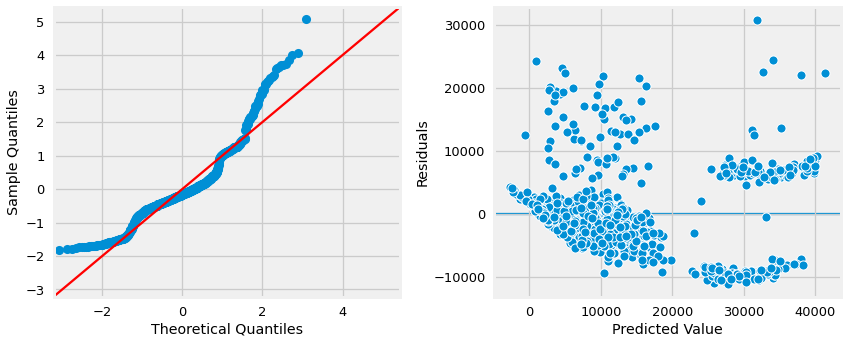

In [25]:
## instantiate an OLS model WITH the training data.
model_raw = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result_raw = model_raw.fit()
sf.evaluate_ols(result_raw,X_train_df, y_train)

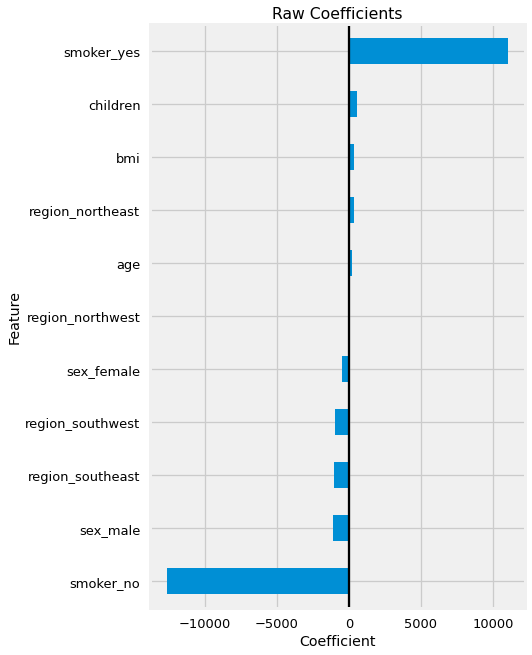

In [26]:
fig_raw = sf.plot_coeffs(result_raw, ohe_cols, include_const=True,title="Raw Coefficients")

In [27]:
fig_raw_zips =sf.plot_coeffs(result_raw, nonohe_cols, figsize=(6,12),
                           include_const=True,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


### Raw Numeric - with Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     373.2
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          3.25e-293
Time:                        15:14:45   Log-Likelihood:                -10154.
No. Observations:                1003   AIC:                         2.033e+04
Df Residuals:                     994   BIC:                         2.037e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                247.4101     13.904     17.795      0.000     220.126     274.694
bmi                390.4240     33.647     11.603      0.000     324.396     456.451
children           580.4765    157.584      3.684      0.000     271.241     889.712
sex_female        -111.5676    308.774     -0.361      0.718    -717.492     494.356
sex_male          -763.1842    324.735     -2.350      0.019   -1400.430    -125.939
smoker_no        -1.228e+04    327.995    -37.446      0.000   -1.29e+04   -1.16e+04
smoker_yes        1.141e+04    363.590     31.374      0.000    1.07e+04    1.21e+04
region_northeast   557.4817    346.056      1.611      0.108    -121.603    1236.567
region_northwest   214.8634    352.766      0.609      0.543    -477.388     907.115
region_southeast  -868.5282    381.319     -2.278      0.023   -1616.811    -120.246
region_southwest  -778.5687    356.742     -2.182      0.029   -1478.622     -78.515
const             -874.7518    502.972     -1.739      0.082   -1861.760     112.256
==============================================================================
Omnibus:                      233.427   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.146
Skew:                           1.231   Prob(JB):                    1.56e-124
Kurtosis:                       5.753   Cond. No.                     6.62e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.05e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

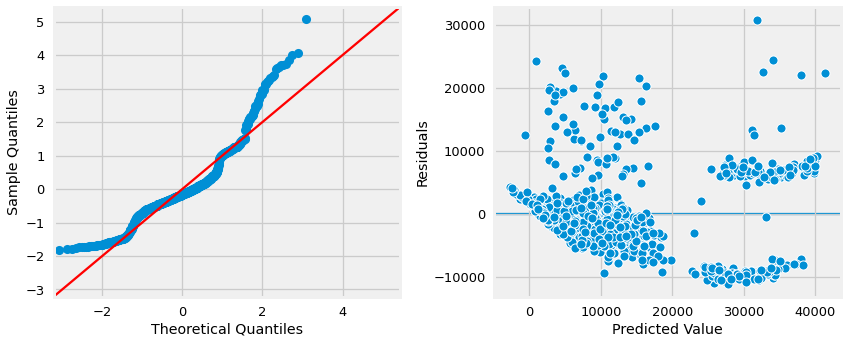

In [28]:
## instantiate an OLS model WITH the training data.
model_raw_cnst = sm.OLS(y_train, X_train_df_cnst)

## Fit the model and view the summary
result_raw_cnst = model_raw_cnst.fit()
sf.evaluate_ols(result_raw_cnst,X_train_df_cnst, y_train)

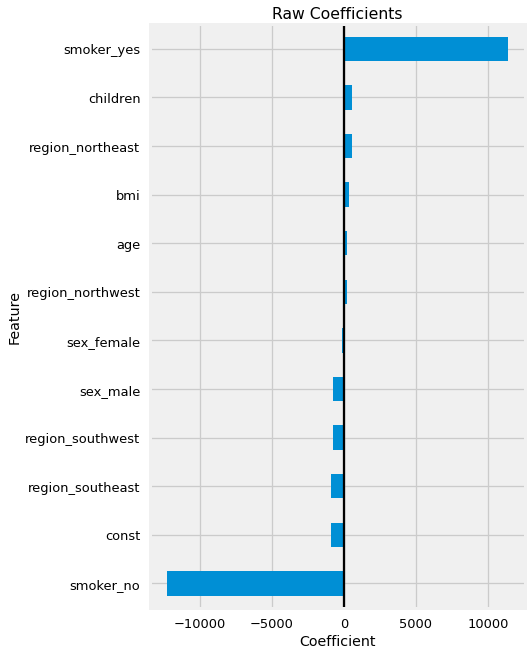

In [29]:
fig_raw =sf.plot_coeffs(result_raw_cnst, ohe_cols, include_const=True,title="Raw Coefficients")

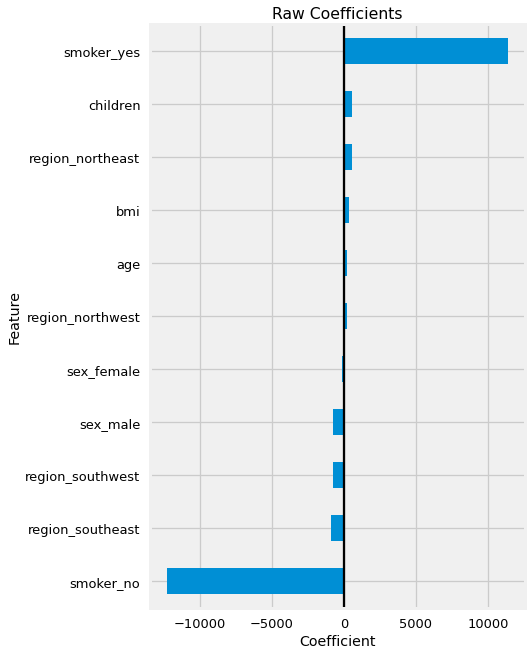

In [30]:
fig_raw =sf.plot_coeffs(result_raw_cnst, ohe_cols, include_const=False,title="Raw Coefficients")

In [31]:
fig_raw_zips =sf.plot_coeffs(result_raw_cnst, nonohe_cols, figsize=(6,12),include_const=False,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


### Scaled Numeric - No Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     373.2
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          3.25e-293
Time:                        15:14:46   Log-Likelihood:                -10154.
No. Observations:                1003   AIC:                         2.033e+04
Df Residuals:                     994   BIC:                         2.037e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age               3442.1318    193.436     17.795      0.000    3062.542    3821.721
bmi               2330.7700    200.868     11.603      0.000    1936.596    2724.944
children           707.3987    192.040      3.684      0.000     330.548    1084.250
sex_female        8475.0965    220.803     38.383      0.000    8041.803    8908.389
sex_male          7823.4798    208.790     37.470      0.000    7413.759    8233.200
smoker_no        -3695.3234    197.371    -18.723      0.000   -4082.635   -3308.012
smoker_yes        1.999e+04    303.935     65.783      0.000    1.94e+04    2.06e+04
region_northeast  4850.8137    342.265     14.173      0.000    4179.169    5522.458
region_northwest  4508.1954    343.906     13.109      0.000    3833.330    5183.061
region_southeast  3424.8038    335.423     10.210      0.000    2766.586    4083.022
region_southwest  3514.7633    338.702     10.377      0.000    2850.110    4179.417
==============================================================================
Omnibus:                      233.427   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.146
Skew:                           1.231   Prob(JB):                    1.56e-124
Kurtosis:                       5.753   Cond. No.                     1.14e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

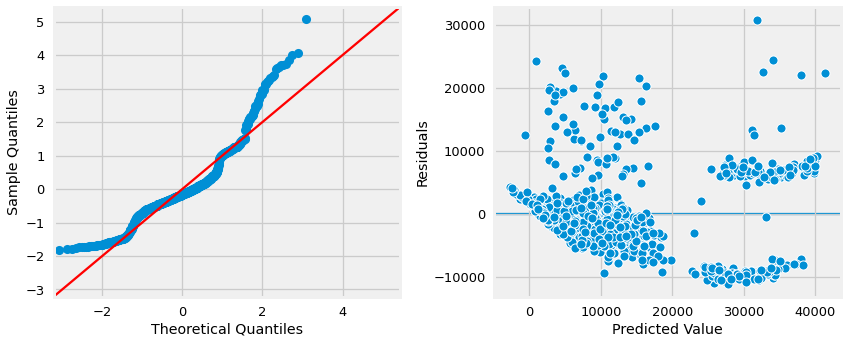

In [32]:
## instantiate an OLS model WITH the training data.
model_scaled = sm.OLS(y_train, X_train_scaled_df)

## Fit the model and view the summary
result_scaled = model_scaled.fit()
sf.evaluate_ols(result_scaled,X_train_scaled_df, y_train)

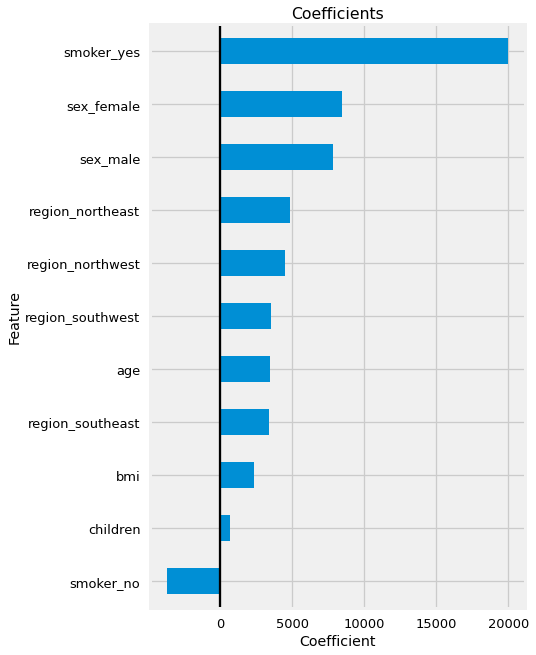

In [33]:
fig_scaled =sf.plot_coeffs(result_scaled,ohe_cols,include_const=True)

In [34]:
fig_scaled_zips =sf.plot_coeffs(result_scaled, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


### Scaled Numeric - with Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     373.2
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          3.25e-293
Time:                        15:14:46   Log-Likelihood:                -10154.
No. Observations:                1003   AIC:                         2.033e+04
Df Residuals:                     994   BIC:                         2.037e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age               3442.1318    193.436     17.795      0.000    3062.542    3821.721
bmi               2330.7700    200.868     11.603      0.000    1936.596    2724.944
children           707.3987    192.040      3.684      0.000     330.548    1084.250
sex_female        4853.1906    203.396     23.861      0.000    4454.055    5252.326
sex_male          4201.5740    196.222     21.412      0.000    3816.517    4586.631
smoker_no        -7317.2293    211.162    -34.652      0.000   -7731.605   -6902.854
smoker_yes        1.637e+04    272.522     60.076      0.000    1.58e+04    1.69e+04
region_northeast  3039.8608    339.587      8.952      0.000    2373.472    3706.250
region_northwest  2697.2425    340.900      7.912      0.000    2028.277    3366.208
region_southeast  1613.8509    334.821      4.820      0.000     956.813    2270.889
region_southwest  1703.8104    335.813      5.074      0.000    1044.827    2362.794
const             9054.7646    105.535     85.799      0.000    8847.667    9261.862
==============================================================================
Omnibus:                      233.427   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.146
Skew:                           1.231   Prob(JB):                    1.56e-124
Kurtosis:                       5.753   Cond. No.                     1.60e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.55e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

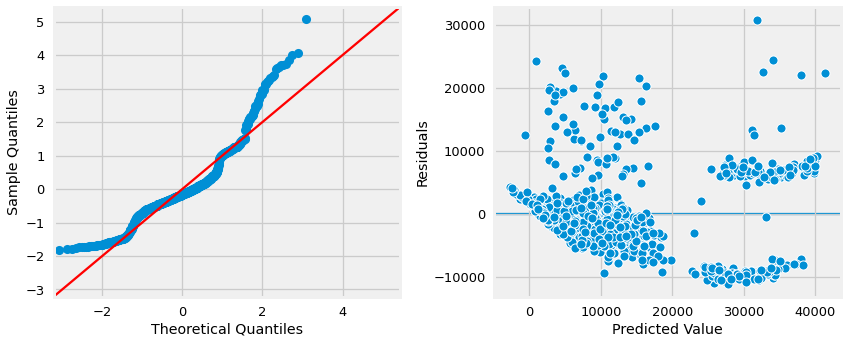

In [35]:
## instantiate an OLS model WITH the training data.
model_scaled_cnst = sm.OLS(y_train, X_train_scaled_df_cnst)

## Fit the model and view the summary
result_scaled_cnst = model_scaled_cnst.fit()
sf.evaluate_ols(result_scaled_cnst,X_train_scaled_df_cnst, y_train)

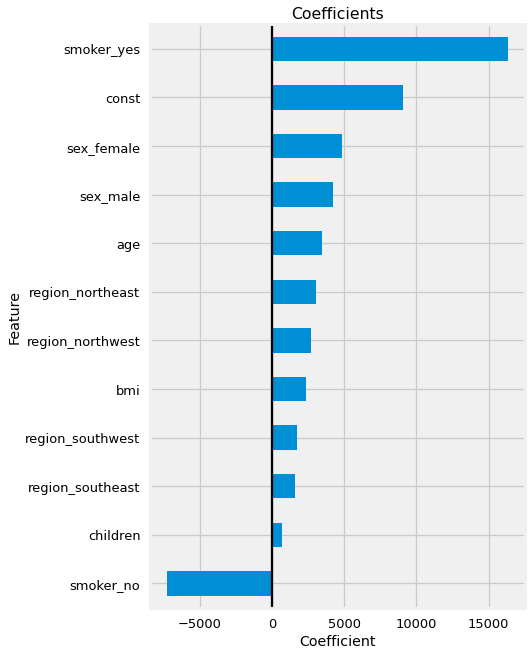

In [36]:
fig_scaled =sf.plot_coeffs(result_scaled_cnst,ohe_cols,include_const=True)

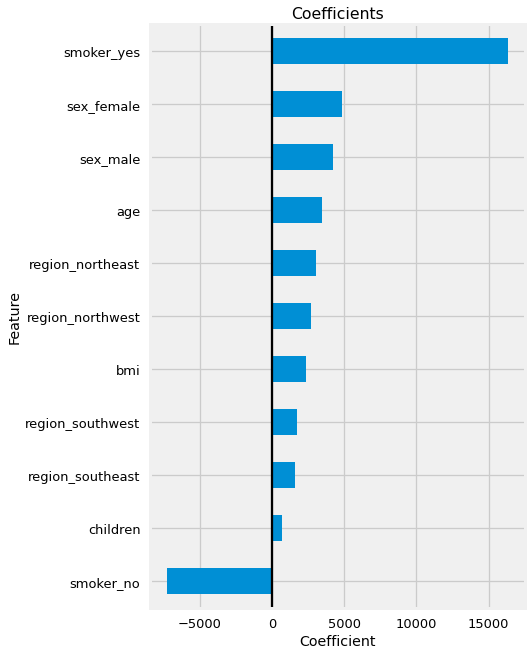

In [37]:
fig_scaled =sf.plot_coeffs(result_scaled_cnst,ohe_cols,include_const=False)

In [38]:
fig_scaled_zips =sf.plot_coeffs(result_scaled_cnst, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


## Modeling - No Outliers

### Raw Numeric - No Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     399.1
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          6.50e-301
Time:                        15:14:46   Log-Likelihood:                -9860.3
No. Observations:                 981   AIC:                         1.974e+04
Df Residuals:                     972   BIC:                         1.978e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                257.8943     12.987     19.857      0.000     232.408     283.381
bmi                346.8623     31.616     10.971      0.000     284.819     408.906
children           498.8747    161.164      3.095      0.002     182.605     815.144
sex_female        -489.4180    458.595     -1.067      0.286   -1389.368     410.532
sex_male          -641.5291    468.310     -1.370      0.171   -1560.545     277.486
smoker_no        -1.218e+04    464.245    -26.229      0.000   -1.31e+04   -1.13e+04
smoker_yes        1.105e+04    500.230     22.082      0.000    1.01e+04     1.2e+04
region_northeast   265.8572    368.022      0.722      0.470    -456.353     988.067
region_northwest  -283.5666    368.981     -0.769      0.442   -1007.657     440.524
region_southeast  -409.8239    410.496     -0.998      0.318   -1215.384     395.737
region_southwest  -703.4138    378.405     -1.859      0.063   -1446.000      39.172
==============================================================================
Omnibus:                      190.784   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.850
Skew:                           1.103   Prob(JB):                     3.00e-86
Kurtosis:                       5.183   Cond. No.                     3.52e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

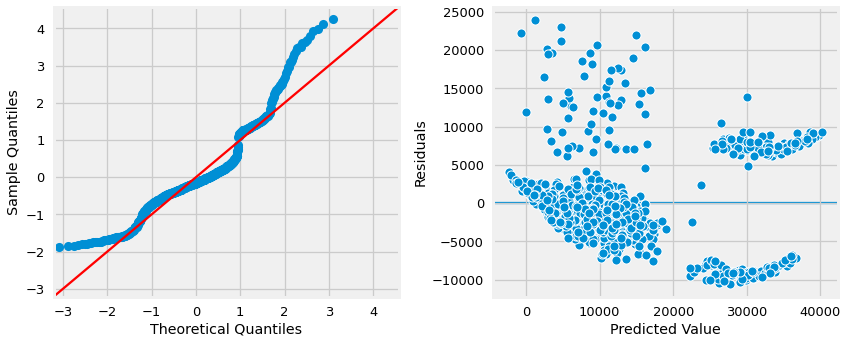

In [39]:
## instantiate an OLS model WITH the training data.
model_cln = sm.OLS(y_train_cln, X_train_df_cln)

## Fit the model and view the summary
result_cln = model_cln.fit()
sf.evaluate_ols(result_cln,X_train_df_cln, y_train_cln)

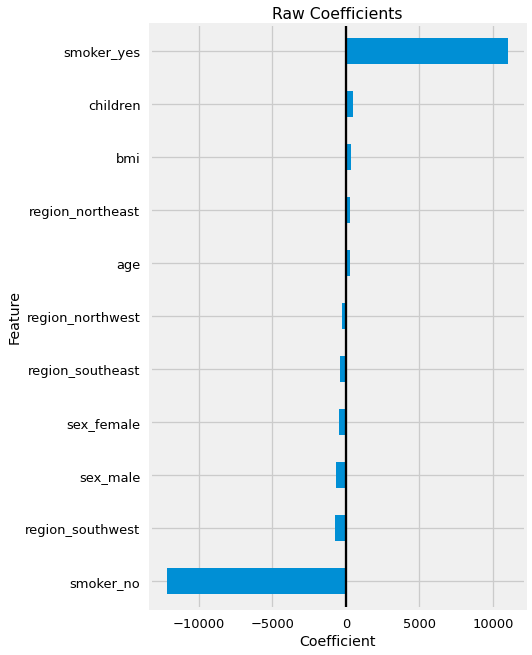

In [40]:
fig_raw =sf.plot_coeffs(result_cln, ohe_cols, include_const=True,title="Raw Coefficients")

In [41]:
fig_raw_zips =sf.plot_coeffs(result_cln, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


### Raw Numeric - with Constant

In [42]:
X_train_df_cln_cnst.describe()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,const
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.0
mean,39.462793,30.558486,1.040775,0.490316,0.509684,0.797146,0.202854,0.238532,0.239551,0.271152,0.250765,1.0
std,14.015731,5.945900,1.124118,0.500161,0.500161,0.402330,0.402330,0.426403,0.427027,0.444781,0.433674,0.0
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,27.000000,26.315000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,40.000000,30.210000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,52.000000,34.430000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0
max,64.000000,47.740000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     399.1
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          6.50e-301
Time:                        15:14:47   Log-Likelihood:                -9860.3
No. Observations:                 981   AIC:                         1.974e+04
Df Residuals:                     972   BIC:                         1.978e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                257.8943     12.987     19.857      0.000     232.408     283.381
bmi                346.8623     31.616     10.971      0.000     284.819     408.906
children           498.8747    161.164      3.095      0.002     182.605     815.144
sex_female        -238.0964    294.024     -0.810      0.418    -815.091     338.898
sex_male          -390.2075    302.412     -1.290      0.197    -983.662     203.247
smoker_no        -1.193e+04    312.050    -38.216      0.000   -1.25e+04   -1.13e+04
smoker_yes         1.13e+04    341.551     33.076      0.000    1.06e+04     1.2e+04
region_northeast   391.5180    330.948      1.183      0.237    -257.938    1040.974
region_northwest  -157.9058    331.234     -0.477      0.634    -807.922     492.110
region_southeast  -284.1631    355.763     -0.799      0.425    -982.315     413.989
region_southwest  -577.7530    334.087     -1.729      0.084   -1233.367      77.861
const             -628.3039    474.079     -1.325      0.185   -1558.640     302.032
==============================================================================
Omnibus:                      190.784   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.850
Skew:                           1.103   Prob(JB):                     3.00e-86
Kurtosis:                       5.183   Cond. No.                     5.77e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.78e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

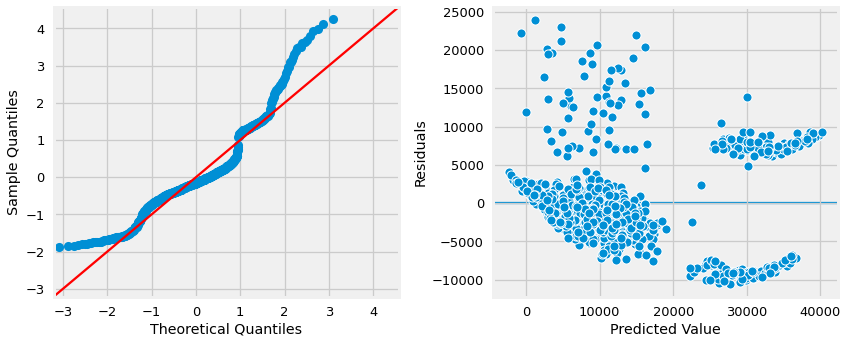

In [43]:
## instantiate an OLS model WITH the training data.
model_cln_cnst = sm.OLS(y_train_cln, X_train_df_cln_cnst)

## Fit the model and view the summary
result_cln_cnst = model_cln_cnst.fit()
sf.evaluate_ols(result_cln_cnst,X_train_df_cln_cnst, y_train_cln)

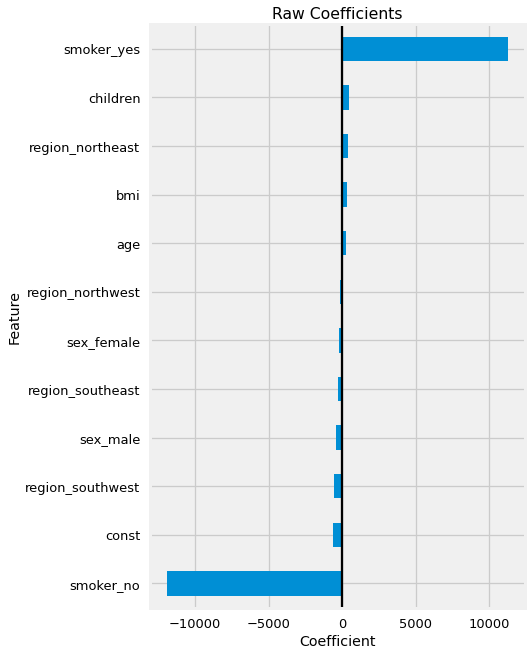

In [44]:
fig_raw =sf.plot_coeffs(result_cln_cnst, ohe_cols, include_const=True,title="Raw Coefficients")

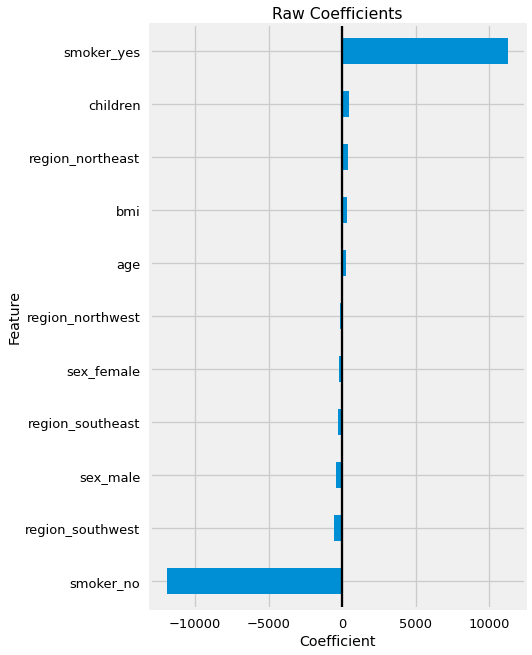

In [45]:
fig_raw =sf.plot_coeffs(result_cln_cnst, ohe_cols, include_const=False,title="Raw Coefficients")

In [46]:
fig_raw_zips =sf.plot_coeffs(result_cln_cnst, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


### Scaled Numeric - No Constant

In [47]:
X_train_scaled_df_cln.describe()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,9.810000e+02,9.810000e+02,9.810000e+02,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,-1.484824e-16,-2.571281e-16,4.889056e-17,0.490316,0.509684,0.797146,0.202854,0.238532,0.239551,0.271152,0.250765
std,1.000510e+00,1.000510e+00,1.000510e+00,0.500161,0.500161,0.402330,0.402330,0.426403,0.427027,0.444781,0.433674
min,-1.532117e+00,-2.456471e+00,-9.263310e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.896539e-01,-7.140467e-01,-9.263310e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.834841e-02,-5.863939e-02,-3.629113e-02,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.949660e-01,6.514553e-01,8.537488e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.751584e+00,2.891114e+00,2.633829e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     399.1
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          6.50e-301
Time:                        15:14:47   Log-Likelihood:                -9860.3
No. Observations:                 981   AIC:                         1.974e+04
Df Residuals:                     972   BIC:                         1.978e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age               3612.7343    181.936     19.857      0.000    3255.701    3969.767
bmi               2061.3574    187.890     10.971      0.000    1692.641    2430.074
children           560.5083    181.075      3.095      0.002     205.165     915.852
sex_female        8028.9953    206.851     38.815      0.000    7623.069    8434.922
sex_male          7876.8841    197.343     39.915      0.000    7489.618    8264.151
smoker_no        -3658.3644    186.088    -19.659      0.000   -4023.544   -3293.184
smoker_yes        1.956e+04    288.500     67.814      0.000     1.9e+04    2.01e+04
region_northeast  4525.0638    324.631     13.939      0.000    3888.006    5162.122
region_northwest  3975.6400    323.202     12.301      0.000    3341.386    4609.894
region_southeast  3849.3827    314.837     12.227      0.000    3231.543    4467.222
region_southwest  3555.7929    316.814     11.224      0.000    2934.074    4177.512
==============================================================================
Omnibus:                      190.784   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.850
Skew:                           1.103   Prob(JB):                     3.00e-86
Kurtosis:                       5.183   Cond. No.                     6.98e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.98e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

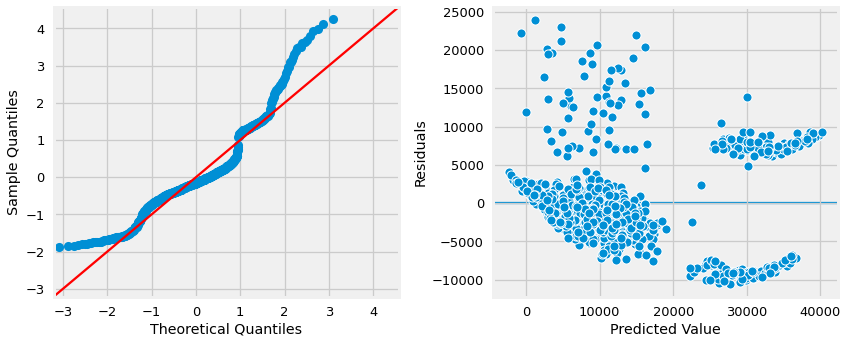

In [48]:
## instantiate an OLS model WITH the training data.
model_cln_scaled = sm.OLS(y_train_cln, X_train_scaled_df_cln)

## Fit the model and view the summary
result_cln_scaled = model_cln_scaled.fit()
sf.evaluate_ols(result_cln_scaled,X_train_scaled_df_cln, y_train_cln)

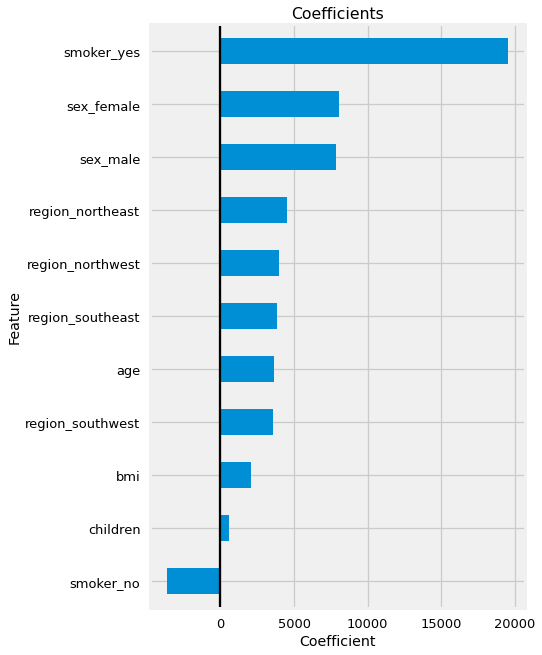

In [49]:
fig_scaled =sf.plot_coeffs(result_cln_scaled,ohe_cols,include_const=True)

In [50]:
fig_scaled_zips =sf.plot_coeffs(result_cln_scaled, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


### Scaled Numeric - with Constant

In [51]:
X_train_scaled_df_cln_cnst.describe()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,const
count,9.810000e+02,9.810000e+02,9.810000e+02,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.0
mean,-1.484824e-16,-2.571281e-16,4.889056e-17,0.490316,0.509684,0.797146,0.202854,0.238532,0.239551,0.271152,0.250765,1.0
std,1.000510e+00,1.000510e+00,1.000510e+00,0.500161,0.500161,0.402330,0.402330,0.426403,0.427027,0.444781,0.433674,0.0
min,-1.532117e+00,-2.456471e+00,-9.263310e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,-8.896539e-01,-7.140467e-01,-9.263310e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,3.834841e-02,-5.863939e-02,-3.629113e-02,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,8.949660e-01,6.514553e-01,8.537488e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0
max,1.751584e+00,2.891114e+00,2.633829e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     399.1
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          6.50e-301
Time:                        15:14:47   Log-Likelihood:                -9860.3
No. Observations:                 981   AIC:                         1.974e+04
Df Residuals:                     972   BIC:                         1.978e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age               3612.7343    181.936     19.857      0.000    3255.701    3969.767
bmi               2061.3574    187.890     10.971      0.000    1692.641    2430.074
children           560.5083    181.075      3.095      0.002     205.165     915.852
sex_female        4494.3554    190.609     23.579      0.000    4120.302    4868.409
sex_male          4342.2443    184.923     23.481      0.000    3979.349    4705.139
smoker_no        -7193.0043    199.570    -36.043      0.000   -7584.641   -6801.367
smoker_yes        1.603e+04    258.515     62.006      0.000    1.55e+04    1.65e+04
region_northeast  2757.7439    321.818      8.569      0.000    2126.205    3389.282
region_northwest  2208.3201    320.701      6.886      0.000    1578.973    2837.667
region_southeast  2082.0628    314.258      6.625      0.000    1465.361    2698.765
region_southwest  1788.4729    313.947      5.697      0.000    1172.381    2404.565
const             8836.5997    100.013     88.354      0.000    8640.333    9032.867
==============================================================================
Omnibus:                      190.784   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.850
Skew:                           1.103   Prob(JB):                     3.00e-86
Kurtosis:                       5.183   Cond. No.                     9.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.69e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

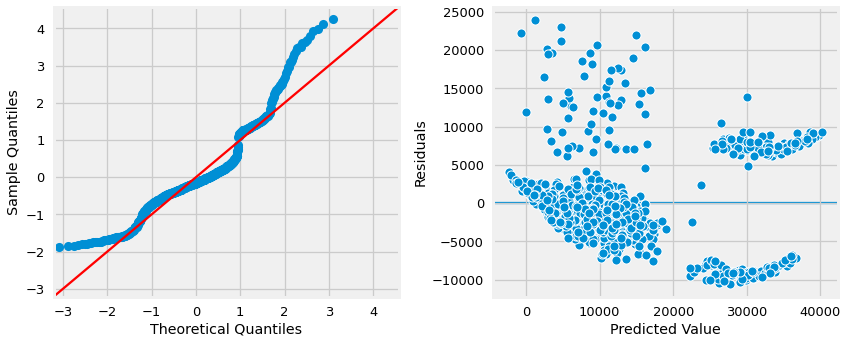

In [52]:
## instantiate an OLS model WITH the training data.
model_cln_scaled_cnst = sm.OLS(y_train_cln, X_train_scaled_df_cln_cnst)

## Fit the model and view the summary
result_cln_scaled_cnst = model_cln_scaled_cnst.fit()
sf.evaluate_ols(result_cln_scaled_cnst,X_train_scaled_df_cln_cnst, y_train_cln)

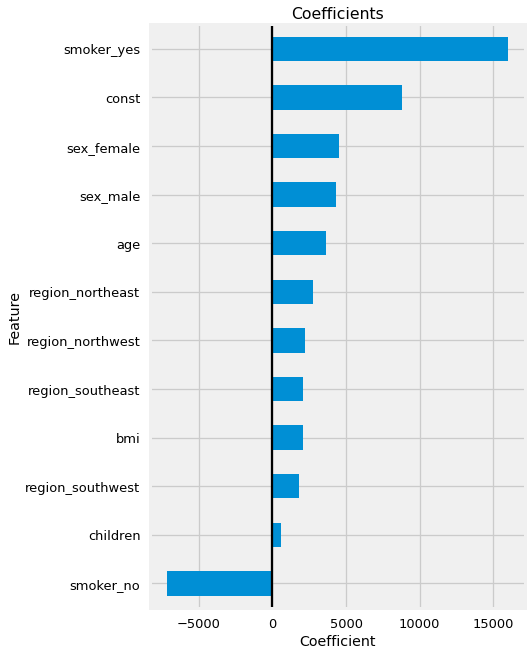

In [53]:
fig_scaled =sf.plot_coeffs(result_cln_scaled_cnst,ohe_cols,include_const=True)

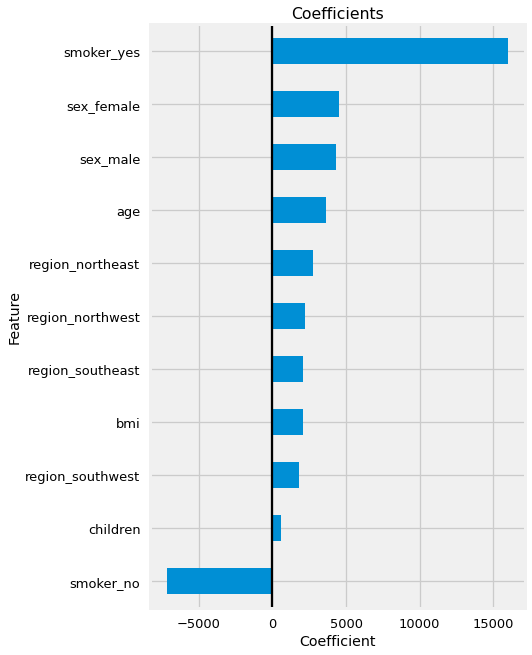

In [54]:
fig_scaled =sf.plot_coeffs(result_cln_scaled_cnst,ohe_cols,include_const=False)

# Adding Explanations

## Sklearn LinearRegression

> Pick 1 of the statsmodels models above to remake in sklearn for model explanations

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
## Making new var name sfor sklearn - update these to change model
ols_results = result_scaled_cnst
# sf.evaluate_ols(ols_results,X_tr,y_tr)
X_tr = X_train_scaled_df_cnst
X_te = X_test_scaled_df_cnst
y_tr = y_train
y_te = y_test

## If const in orig df, 
fit_intercept = 'const' in X_tr.columns

if fit_intercept==True:
    X_tr = X_tr.drop(columns='const')
    X_te = X_te.drop(columns='const')
fit_intercept

True

In [57]:
linreg = LinearRegression(fit_intercept=fit_intercept)
linreg.fit(X_tr, y_tr)
print(f"Train R^2: {format(linreg.score(X_tr,y_tr),'.2f')}")
print(f"Test R^2: {format(linreg.score(X_te,y_te),'.2f')}")
linreg.get_params()

Train R^2: 0.75
Test R^2: 0.75


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [58]:
coeffs = sf.get_coeffs(linreg,X_tr,name='LinReg Coeffs')
coeffs#.head(20)

age                  3442.131750
bmi                  2330.769974
children              707.398702
sex_female            325.808312
sex_male             -325.808312
smoker_no          -11844.611588
smoker_yes          11844.611588
region_northeast      776.169636
region_northwest      433.551359
region_southeast     -649.840273
region_southwest     -559.880722
const               20373.220348
Name: LinReg Coeffs, dtype: float64

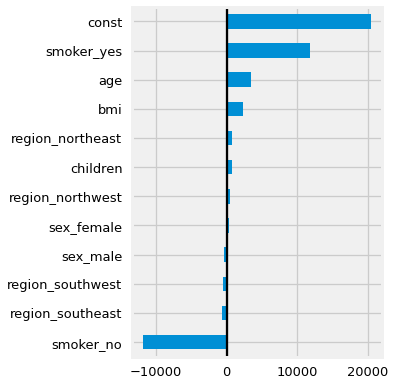

In [59]:
ax = coeffs.drop(ohe_cols).sort_values().plot(kind='barh',figsize=(4,6))
ax.axvline(0,color='black')

In [60]:
if len(ohe_cols)>1:

    ax = coeffs[ohe_cols].sort_values().plot(kind='barh',figsize=(4,6))
    ax.axvline(0,color='black')

In [61]:
## save 1 df of skelarn vs ols coeffs
compare_coeffs = pd.DataFrame({'OLS':ols_results.params,
                              'LinReg':coeffs}).round(2)
compare_coeffs['Agree?'] = compare_coeffs['OLS']==compare_coeffs['LinReg']

display(compare_coeffs.round(3))
compare_coeffs['Agree?'].value_counts(1)
#compare_coeffs.style.format({'OLS':"{:,.2f}","LinReg":"{:,.2f}"})

,OLS,LinReg,Agree?
age,3442.13,3442.13,True
bmi,2330.77,2330.77,True
children,707.40,707.40,True
sex_female,4853.19,325.81,False
sex_male,4201.57,-325.81,False
smoker_no,-7317.23,-11844.61,False
smoker_yes,16371.99,11844.61,False
region_northeast,3039.86,776.17,False
region_northwest,2697.24,433.55,False
region_southeast,1613.85,-649.84,False


False    0.75
True     0.25
Name: Agree?, dtype: float64

In [62]:
compare_coeffs[compare_coeffs['Agree?']==True]

,OLS,LinReg,Agree?
age,3442.13,3442.13,True
bmi,2330.77,2330.77,True
children,707.40,707.40,True


In [63]:
# compare_coeffs[compare_coeffs['Agree?']==False]

In [64]:
compare_coeffs.style.bar()

,OLS,LinReg,Agree?
age,3442.130000,3442.130000,True
bmi,2330.770000,2330.770000,True
children,707.400000,707.400000,True
sex_female,4853.190000,325.810000,False
sex_male,4201.570000,-325.810000,False
smoker_no,-7317.230000,-11844.610000,False
smoker_yes,16371.990000,11844.610000,False
region_northeast,3039.860000,776.170000,False
region_northwest,2697.240000,433.550000,False
region_southeast,1613.850000,-649.840000,False


> ISSUE WITH COEFFICIENTS NOT MATCHING - SEE IF TRUE FOR OTHER DATASETS. 

### Shap

In [65]:
import shap
shap.initjs()

shap.__version__

'0.41.0'

In [66]:
## sampling 200 rows from training data
X_shap = shap.sample(X_tr,nsamples=200,random_state=321)

In [67]:
## Creating explainer from model and getting shap values
explainer = shap.LinearExplainer(linreg,X_shap)
shap_values = explainer(X_shap)
shap_values.shape

(200, 11)

In [68]:
# [i for i in dir(shap_values) if not i.startswith("_")]

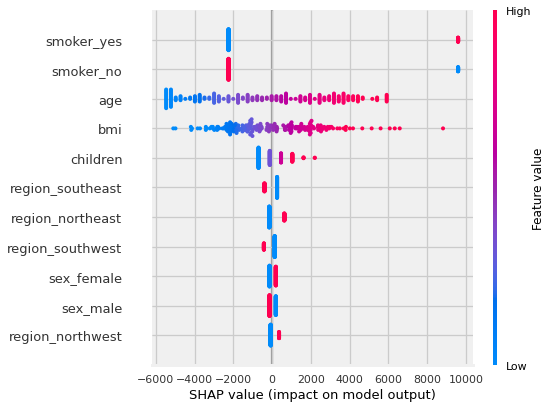

In [69]:
shap.summary_plot(shap_values)

In [70]:
explainer.expected_value

13025.806053098375

In [71]:
shap.force_plot(explainer.expected_value,shap_values= shap_values.values, features=X_shap)       

## RandomForest

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_tr,y_tr)

RandomForestRegressor()

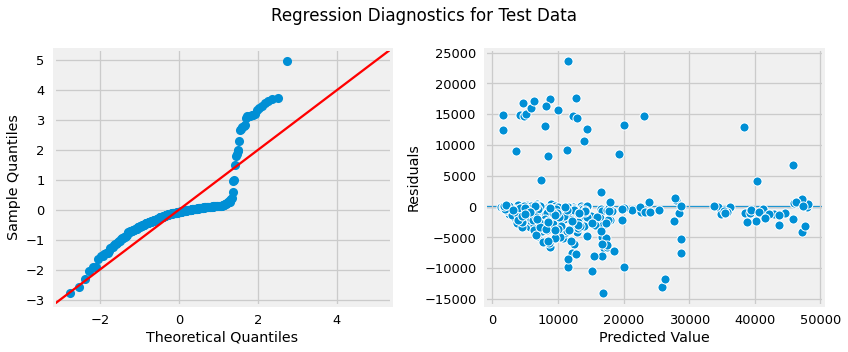

Score
Metric Split         
R^2    Train     0.98
       Test      0.84
RMSE   Train  1879.78
       Test   4885.14

In [73]:
scores = sf.evaluate_regression(rf_reg,X_te, y_te, X_train_df=X_tr, y_train=y_tr,
                            return_scores=True)

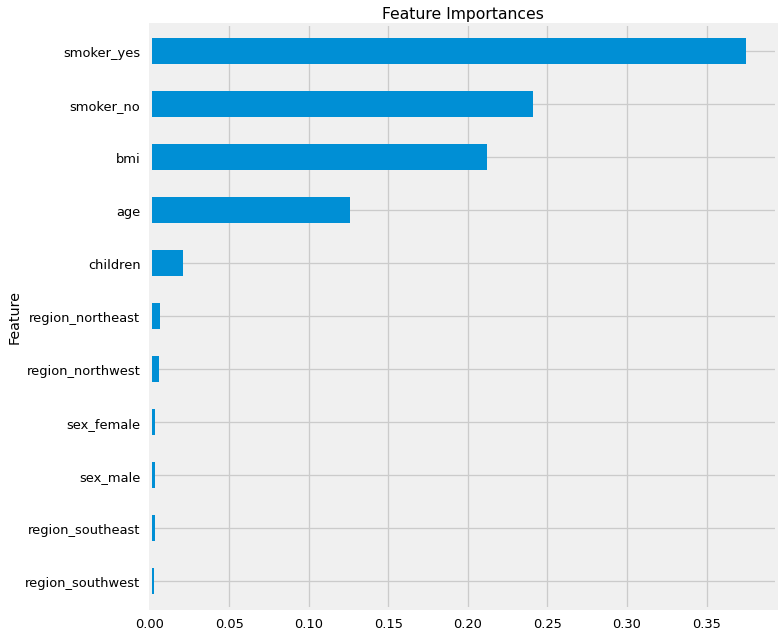

In [74]:
importances = sf.get_importance(rf_reg,X_test_df,top_n=50)

### Permutation Importance

In [75]:
from sklearn.inspection import permutation_importance
## Permutation importance takes a fit mode and test data. 
r = permutation_importance(linreg, X_tr, y_tr,
#                            n_repeats=30
                          )
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [76]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_tr.columns,
                           name = 'permutation importance')
permutation_importances

age                 0.169195
bmi                 0.072035
children            0.007414
sex_female          0.000028
sex_male            0.000028
smoker_no           0.316796
smoker_yes          0.316796
region_northeast    0.001640
region_northwest    0.000265
region_southeast    0.001510
region_southwest    0.000277
Name: permutation importance, dtype: float64

<AxesSubplot:>

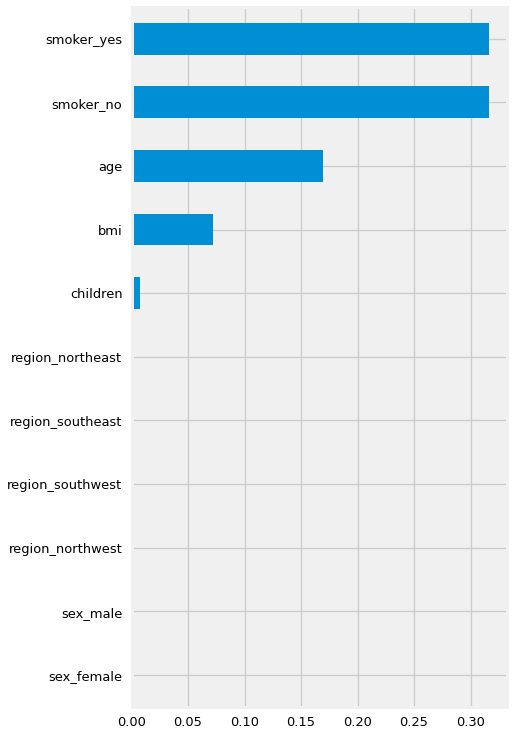

In [77]:
permutation_importances.sort_values().tail(20).plot(kind='barh',figsize=(6,12))

In [78]:
X_shap = shap.sample(X_tr,nsamples=100,random_state=321)

In [79]:
explainer = shap.TreeExplainer(rf_reg,X_shap)
shap_values = explainer(X_shap,check_additivity=False)

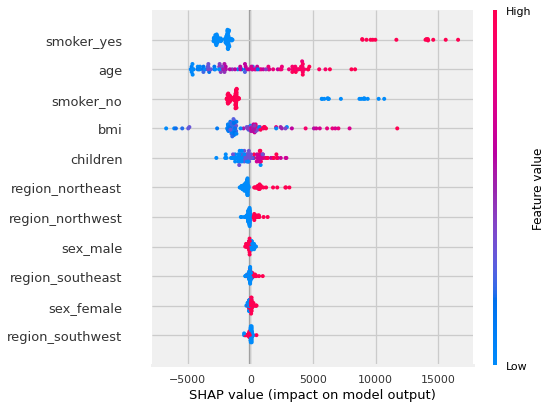

In [80]:
shap.summary_plot(shap_values)

In [81]:
shap.force_plot(explainer.expected_value,shap_values= shap_values.values, features=X_shap)       